<a href="https://colab.research.google.com/github/axieax/csc311/blob/main/csc311_optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# Convex Function Examples

Let's visualize some common convex functions and verify out geometrc intuition.

### Quadratic
$f(\theta) = \theta^2$ 

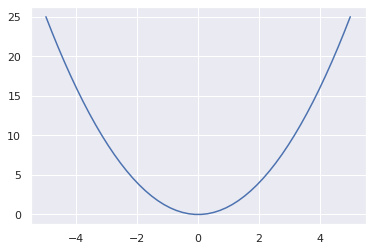

In [ ]:
theta = np.linspace(-5, 5)
f = theta**2
plt.plot(theta, f)

### Negative Log
$f(\theta) = - \log \theta$

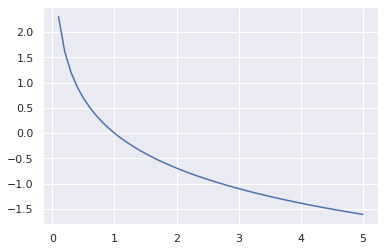

In [ ]:
theta = np.linspace(0.1, 5)
f = -np.log(theta)
plt.plot(theta, f)

### Cross-Entropy Loss
$f(\theta) = - \log \sigma(\theta)$, where $\sigma$ is the Sigmoid function.

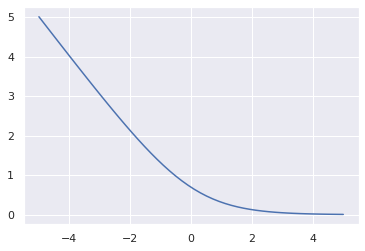

In [ ]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

theta = np.linspace(-5, 5)
f = -np.log(sigmoid(theta))
plt.plot(theta, f)

# Gradient Descent to find Minima

Let's use gradients to find the minima of one of these convex functions. Consider the simple quadratic above and recall the formula for its gradient.

$f(\theta) = \theta^2$

$\nabla_{\theta} f = 2 \theta$

Minima found:  -0.0001462463376025189


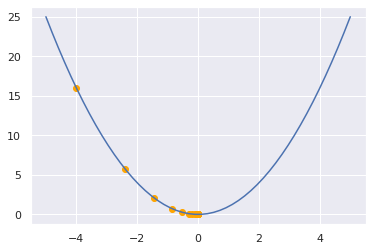

In [ ]:
def objective_fn(thetas):
  return [theta**2 for theta in thetas]

def grad_fn(theta):
  return 2*theta

theta = np.linspace(-5, 5)
f = theta**2
# We can randomly initialize theta as below, but let's just fix it to -4 for ease of visualization.
# theta_init = np.random.uniform(-5, 5)
theta_init = -4 

num_iterations = 20
learning_rate = 0.2
thetas = [theta_init]
theta_cur = theta_init
for i in range(num_iterations):
  update = -learning_rate * grad_fn(theta_cur)
  theta_cur += update
  thetas.append(theta_cur)

plt.plot(theta, f)
plt.scatter(thetas, objective_fn(thetas), c='orange')

print("Minima found: ", thetas[-1])

We know that the solution to this optimization problem is 0, and we can see above that gradient descent get's pretty close to it!

# Gradient Descent for Linear Regression

Let's now apply this to a 2-dimensional linear regression problem using data about the expected marks and hours of study of 100 students.

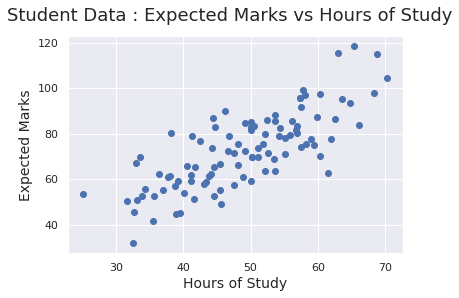

Number of datapoints:  100


In [ ]:
# code adapted from https://colab.research.google.com/github/kaustubholpadkar/Linear_Regression-Gradient_Descent-Octave/blob/master/Linear_Regression_Python.ipynb#scrollTo=fprg4-tcu-4v

data = np.genfromtxt('https://raw.githubusercontent.com/kaustubholpadkar/Linear_Regression-Gradient_Descent-Octave/master/data.csv', delimiter=',')
X = data[:, 0]
Y = data[:, 1]
fig = plt.figure()
plt.scatter(X, Y)
fig.suptitle('Student Data : Expected Marks vs Hours of Study', fontsize=18)
plt.xlabel('Hours of Study', fontsize=14)
plt.ylabel('Expected Marks', fontsize=14)
plt.show()
print("Number of datapoints: ", data.shape[0])

In [ ]:
learning_rate = 0.0001
max_iteration = 50

# The function we are going to learn
def h (m, b, X) :
  return m * X + b

# Initialization of parameters
m = 0
b = 0

# Loss function
def loss (m, b, X, Y) :
  return np.average(np.square(Y - h(m, b, X))) / 2

# Gradient
def gradient (m, b, X, Y) :
  dm = - np.average((Y - h(m, b, X)) * X)
  db = - np.average(Y - h(m, b, X))
  return (dm, db)

def gradient_descent (m, b, X, Y, learning_rate, max_iteration) :
  for i in range(max_iteration) :
    dm, db = gradient (m, b, X, Y)
    m -= learning_rate * dm
    b -= learning_rate * db
    if i % 5 == 0 :
      print ('Iteration : ', i, ' Loss : ', loss(m, b, X, Y)) 
  return (m, b)

# Training
m, b = gradient_descent (m, b, X, Y, learning_rate, max_iteration)

print("Optimal values found for m: ", m, " and b: ", b)

Iteration :  0  Loss :  1593.1334591670338
Iteration :  5  Loss :  143.80483504690565
Iteration :  10  Loss :  61.30482288585254
Iteration :  15  Loss :  56.60864142692714
Iteration :  20  Loss :  56.34127863702311
Iteration :  25  Loss :  56.326016993604796
Iteration :  30  Loss :  56.32510567688097
Iteration :  35  Loss :  56.32501122378965
Iteration :  40  Loss :  56.324963270541446
Iteration :  45  Loss :  56.32491796580532
Optimal values found for m:  1.4788903781318357  and b:  0.030569950649287976


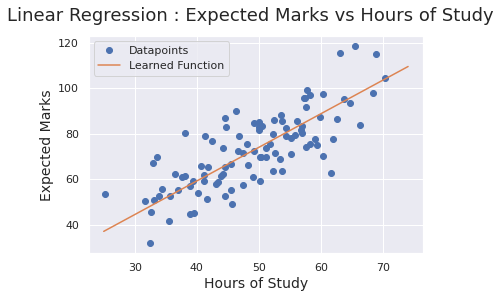

In [ ]:
fig = plt.figure()

# Generate data for plotting Line
x = np.arange(25, 75)
y = [m * x_i + b for x_i in x]

# Generate data for plotting Line Numpy Linear Regression
np_x = np.arange(25, 75)

# plot data and best-fit lines
plt.plot(X, Y, 'o', x, y, '-')
plt.legend(loc='upper left', labels=['Datapoints', 'Learned Function'])

fig.suptitle('Linear Regression : Expected Marks vs Hours of Study', fontsize=18)
plt.xlabel('Hours of Study', fontsize=14)
plt.ylabel('Expected Marks', fontsize=14)
plt.show()